In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from urllib.parse import urlparse

In [4]:
df = pd.read_csv("Phishing_data.csv")

In [5]:
df.head(10)

,URL,label
0,https://www.southbankmosaics.com,1
1,https://www.uni-mainz.de,1
2,https://www.voicefmradio.co.uk,1
3,https://www.sfnmjournal.com,1
4,https://www.rewildingargentina.org,1
5,https://www.globalreporting.org,1
6,https://www.saffronart.com,1
7,https://www.nerdscandy.com,1
8,https://www.hyderabadonline.in,1
9,https://www.aap.org,1


Label represent 2 categories :- 1 (benign url) and 0 (phishing url)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     235795 non-null  object
 1   label   235795 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [7]:
df.isna().sum()

URL      0
label    0
dtype: int64

<h1>Feature Extraction</h1>

In [8]:
suspicious_keywords = [
    "login", "secure", "bank", "update", "free", "lucky", "bonus","urgent", 
    "alert", "verify", "confirm", "account", "action", "immediate","payment",
    "transfer", "credit", "loan", "invoice", "billing", "funds", "cash","win",
    "prize", "contest", "discount", "offer", "deal", "freegift","secure", 
    "safety", "protection", "security", "malware", "phishing","sign-in", 
    "logon", "access", "retrieve", "accountupdate","cheap", "freetrial",
    "bet", "casino", "adult","download", "file", "exe", "attachment", 
    "clickhere","signin"
]

In [9]:
def extract_features(url):
    features = {}

    ## Get Domain 
    domain = urlparse(url).netloc
    if re.match(r"^www.", domain):
        domain = domain.replace("www.", "")
    features['domain'] = domain   

    ## Length of domain 
    features["domain_length"] = len(domain) if domain else 0

    ## TLD (Top Level Domain)
    tld_match = re.search(r'[^.]+$', domain)
    tld = tld_match.group(0) if tld_match else None 
    features["tld"] = tld

    ## TLD length
    features["tld_length"] = len(tld) if tld else 0

    ## Check whether URL is HTTPS or HTTP
    features["is_HTTP"] = 0 if re.match(r"^https:?//", url) else 1   

    ## Check if URL is in the form of IP address
    features["is_IP"] = 1 if re.match(r"^(\d{1,3}\.){3}\d{1,3}$", url) else 0

    ## Count number of Subdomains
    domain_parts = domain.split('.')
    features["no_of_Subdomains"] = len(domain_parts) - 2 if len(domain_parts) > 2 else 0

    ## Depth of URL
    path = urlparse(url).path
    depth = len([segment for segment in path.split('/') if segment])
    features["url_depth"] = depth

    ## Checking for redirection
    pos = url.rfind("//")
    if pos > 6:
        features["redirection"] = 1
    else:
        features["redirection"] = 0

    ## Check if URL contain "@" symbol
    features["contain_@"] = 1 if "@" in url else 0
    
    ## Check if URL contain "-" symbol
    features["contain_hyphen"] = 1 if "-" in url else 0

    ## Check whether URL contain any suspicious keywords
    features["contains_suspicious_keywords"] = 1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0

    return features

In [10]:
features_df = df["URL"].apply(extract_features).apply(pd.Series)
df = pd.concat([df, features_df], axis=1)

In [11]:
df.sample(5)

,URL,label,domain,domain_length,tld,tld_length,is_HTTP,is_IP,no_of_Subdomains,url_depth,redirection,contain_@,contain_hyphen,contains_suspicious_keywords
122922,https://www.exploreinc.com,1,exploreinc.com,14,com,3,0,0,0,0,0,0,0,0
47600,https://pub-885da7a9ab534949a2c53b0725f6ecb0.r...,0,pub-885da7a9ab534949a2c53b0725f6ecb0.r2.dev,43,dev,3,0,0,1,1,0,0,1,0
5990,https://www.emporiagazette.com,1,emporiagazette.com,18,com,3,0,0,0,0,0,0,0,0
6084,https://www.waiahole.org,1,waiahole.org,12,org,3,0,0,0,0,0,0,0,0
66656,https://www.livingdesert.org,1,livingdesert.org,16,org,3,0,0,0,0,0,0,0,0


<h1>EDA</h1>

In [12]:
df.describe()

,label,domain_length,tld_length,is_HTTP,is_IP,no_of_Subdomains,url_depth,redirection,contain_@,contain_hyphen,contains_suspicious_keywords
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.0,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.571895,18.474556,2.764537,0.219466,0.0,0.415815,0.251960,0.003948,0.006391,0.197812,0.060391
std,0.494805,9.869950,0.600297,0.413886,0.0,0.678172,0.875267,0.062712,0.079689,0.398350,0.238211
min,0.000000,4.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,16.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,21.000000,3.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,110.000000,14.000000,1.000000,0.0,10.000000,33.000000,1.000000,1.000000,1.000000,1.000000


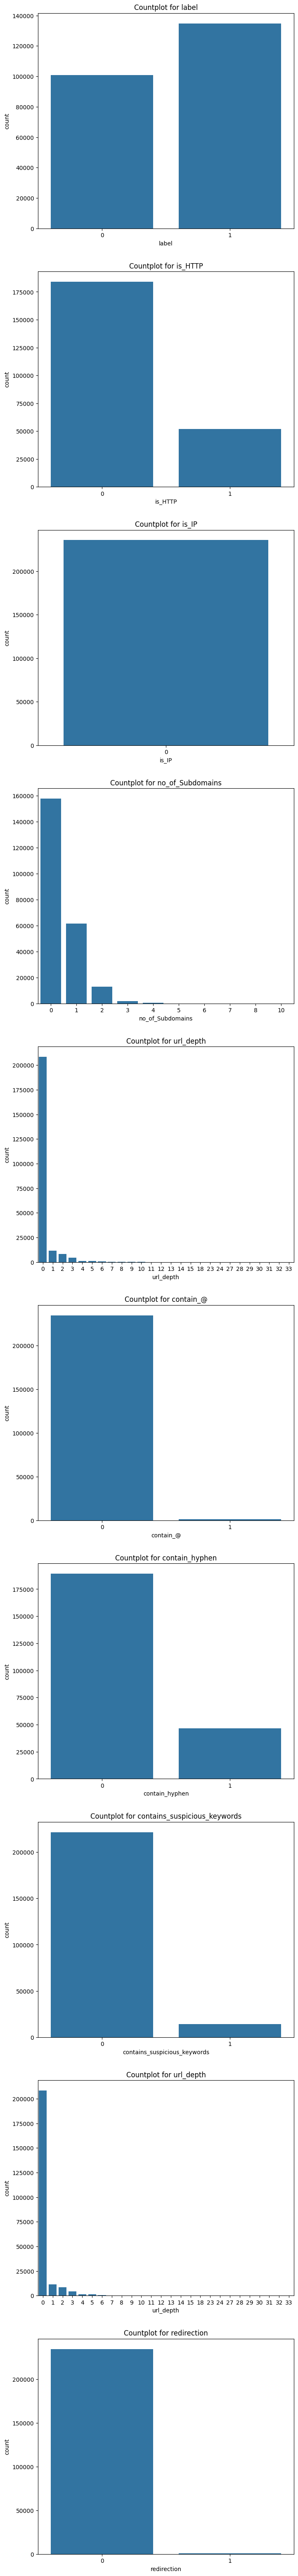

In [13]:
features = ["label","is_HTTP","is_IP","no_of_Subdomains","url_depth","contain_@","contain_hyphen","contains_suspicious_keywords","url_depth","redirection"]
count = len(features)

fig , axs = plt.subplots(count, 1,  figsize=(8 , 8*count))
for i , feature in enumerate(features):
    sns.countplot(x = df[feature] , ax = axs[i])
    axs[i].set_title(f"Countplot for {feature}")

plt.show()

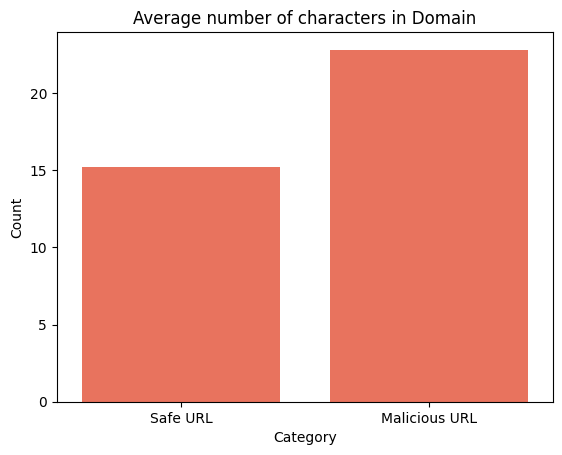

In [14]:
domain_length_mean = df[df["label"] == 1]["domain_length"].mean() , df[df["label"] == 0]["domain_length"].mean()

label = ["Safe URL" , "Malicious URL"]


sns.barplot(x = label , y = domain_length_mean , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Average number of characters in Domain")
plt.show()

Malicious URL/Phishing URL and its domain has more number of average characters as compared to Safe URL/Benign URL

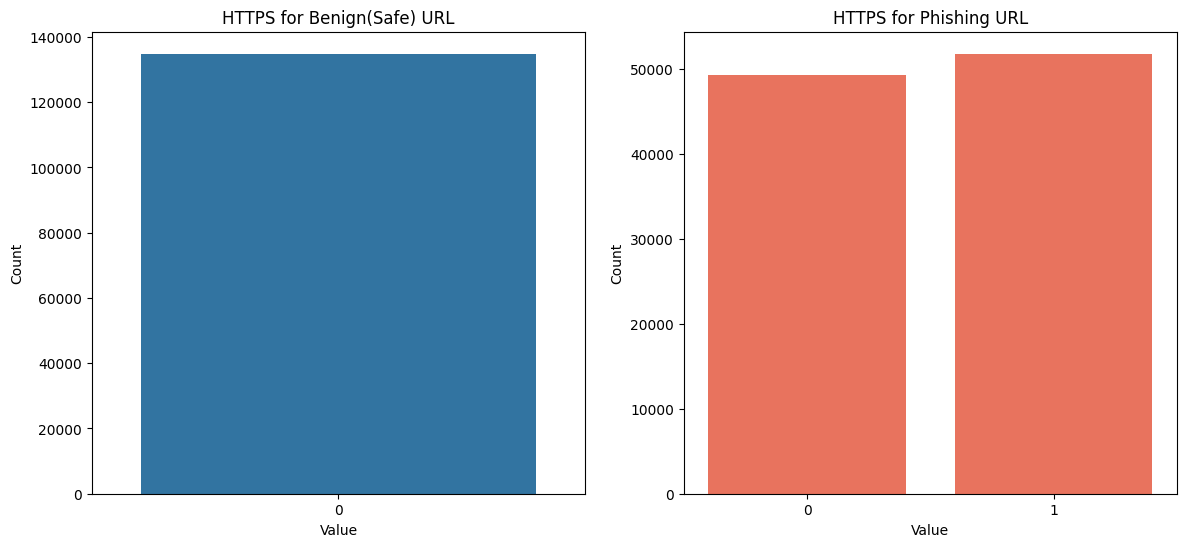

In [15]:
https_safe = df[df["label"] == 1]["is_HTTP"]
https_phish = df[df["label"] == 0]["is_HTTP"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = https_safe)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("HTTPS for Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = https_phish , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("HTTPS for Phishing URL")
plt.show()

Benign(Safe) URL always contain "http" while Malicious URL contains both "http" and "https"

That means if URL starts with "http" we can say that it is malicious but if URL starts with "https" then we have to take look at more features

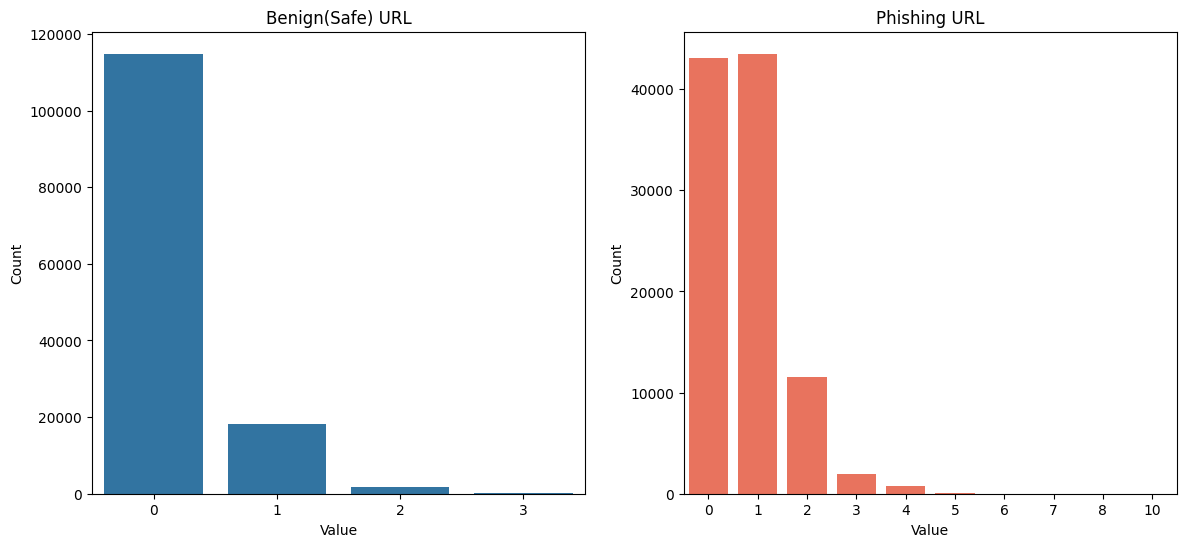

In [16]:
safe_subdom = df[df["label"] == 1]["no_of_Subdomains"]
phish_subdom = df[df["label"] == 0]["no_of_Subdomains"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Phishing URL")
plt.show()

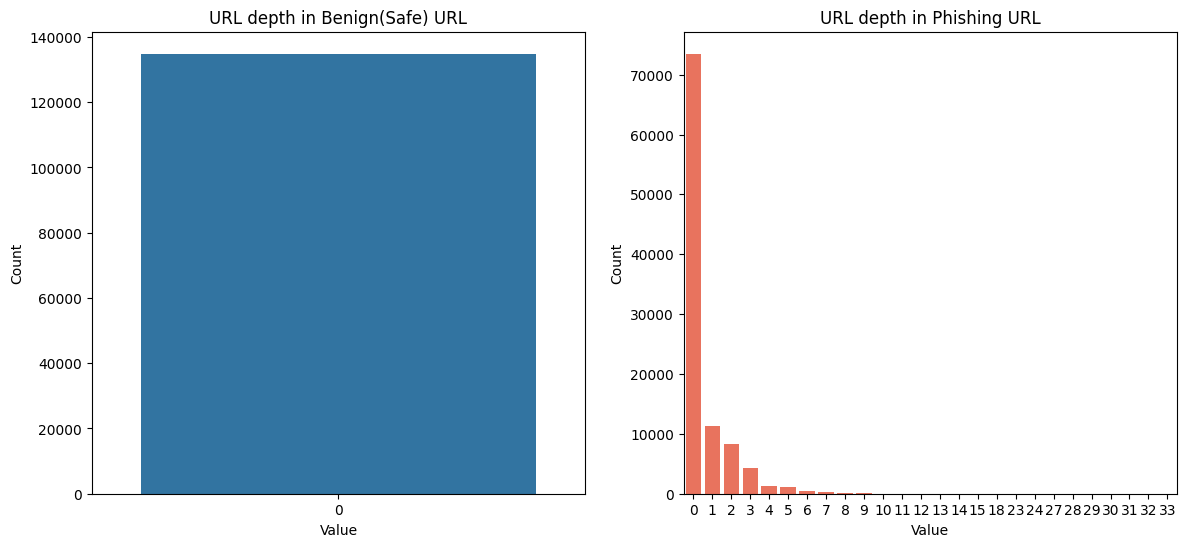

In [17]:
safe_subdom = df[df["label"] == 1]["url_depth"]
phish_subdom = df[df["label"] == 0]["url_depth"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("URL depth in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("URL depth in Phishing URL")
plt.show()

Safe URL does not contain any extra / while in case of Malicious URL it may or may not contain /

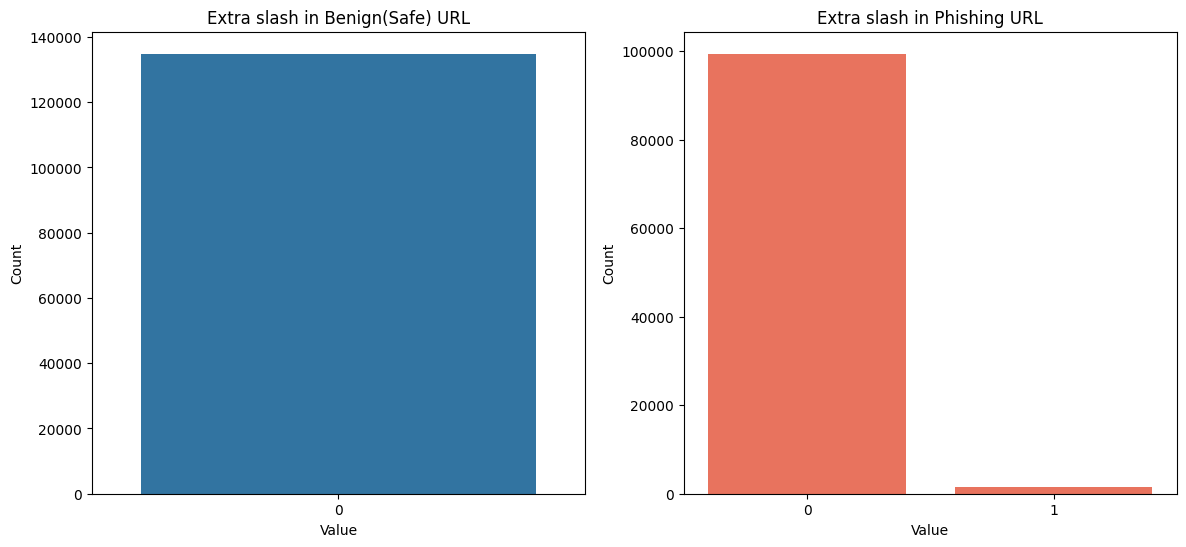

In [18]:
safe_subdom = df[df["label"] == 1]["contain_@"]
phish_subdom = df[df["label"] == 0]["contain_@"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Extra slash in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Extra slash in Phishing URL")
plt.show()

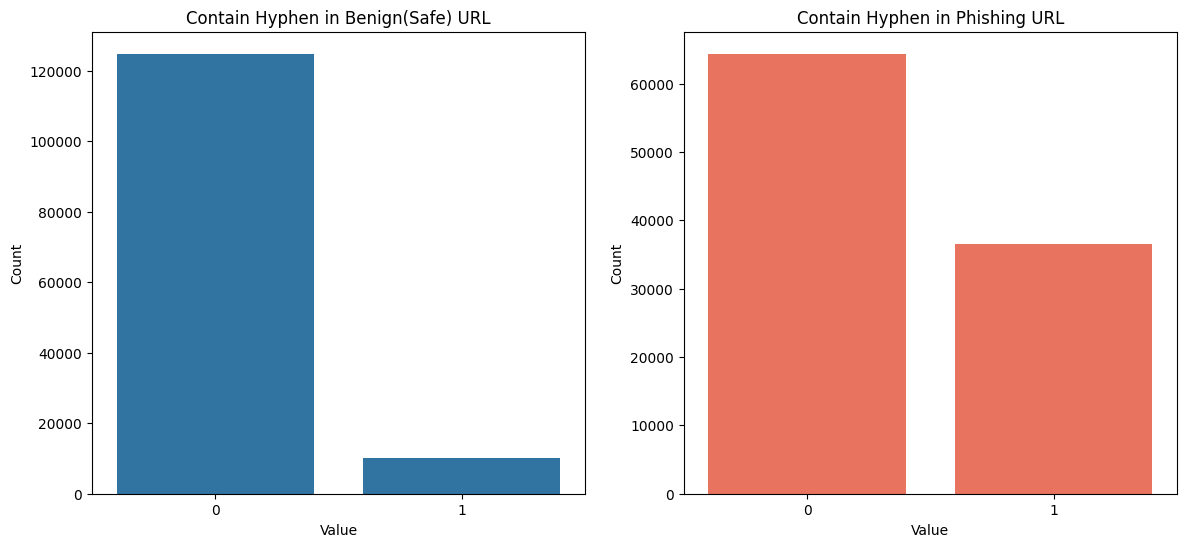

In [19]:
safe_subdom = df[df["label"] == 1]["contain_hyphen"]
phish_subdom = df[df["label"] == 0]["contain_hyphen"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Contain Hyphen in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Contain Hyphen in Phishing URL")
plt.show()

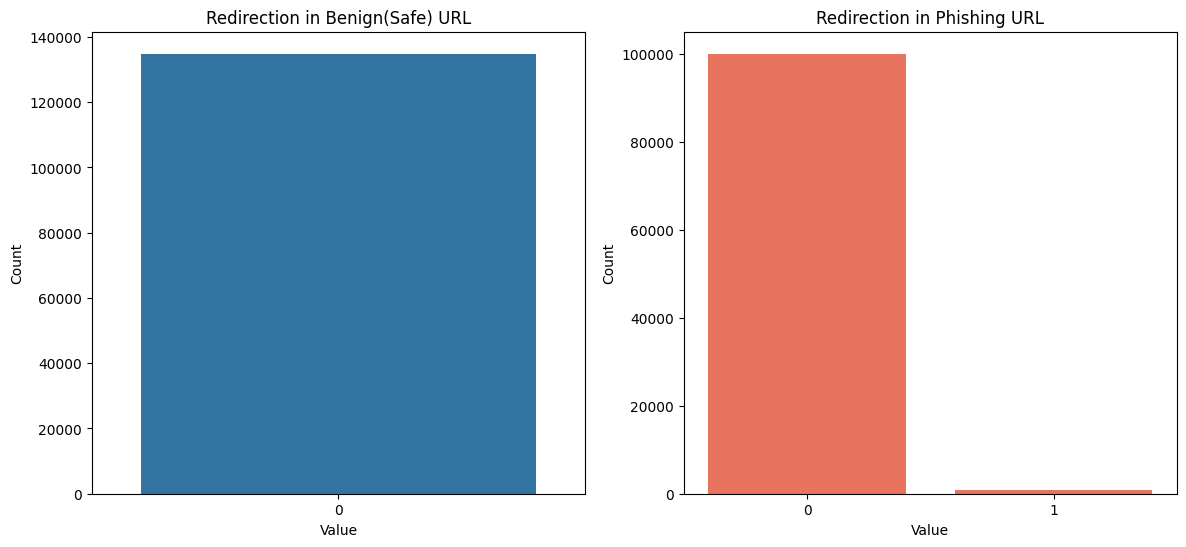

In [20]:
safe_subdom = df[df["label"] == 1]["redirection"]
phish_subdom = df[df["label"] == 0]["redirection"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Redirection in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Redirection in Phishing URL")
plt.show()

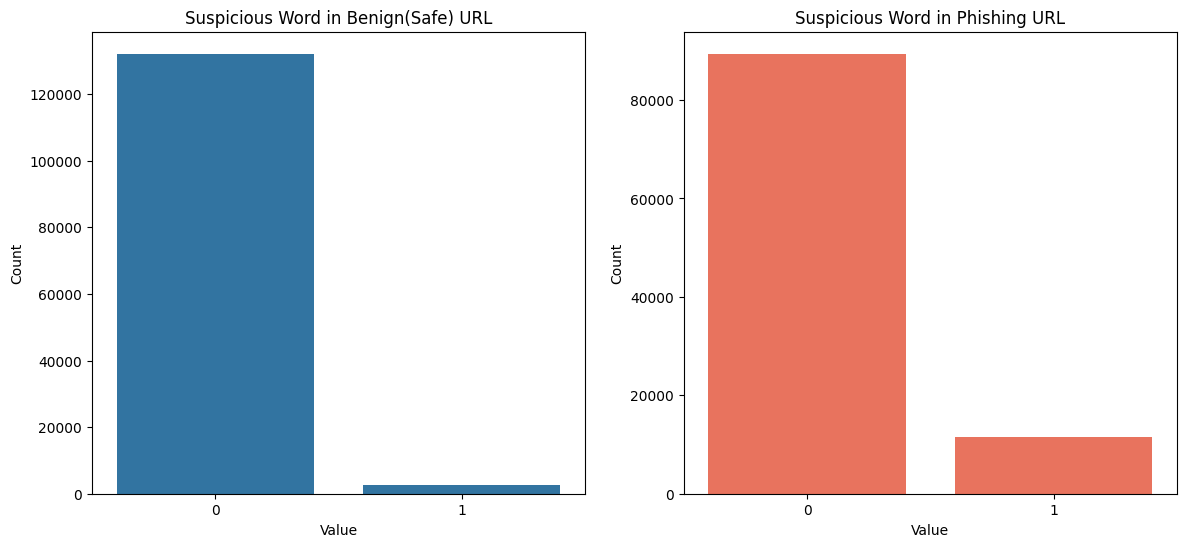

In [21]:
safe_subdom = df[df["label"] == 1]["contains_suspicious_keywords"]
phish_subdom = df[df["label"] == 0]["contains_suspicious_keywords"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Suspicious Word in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Suspicious Word in Phishing URL")
plt.show()

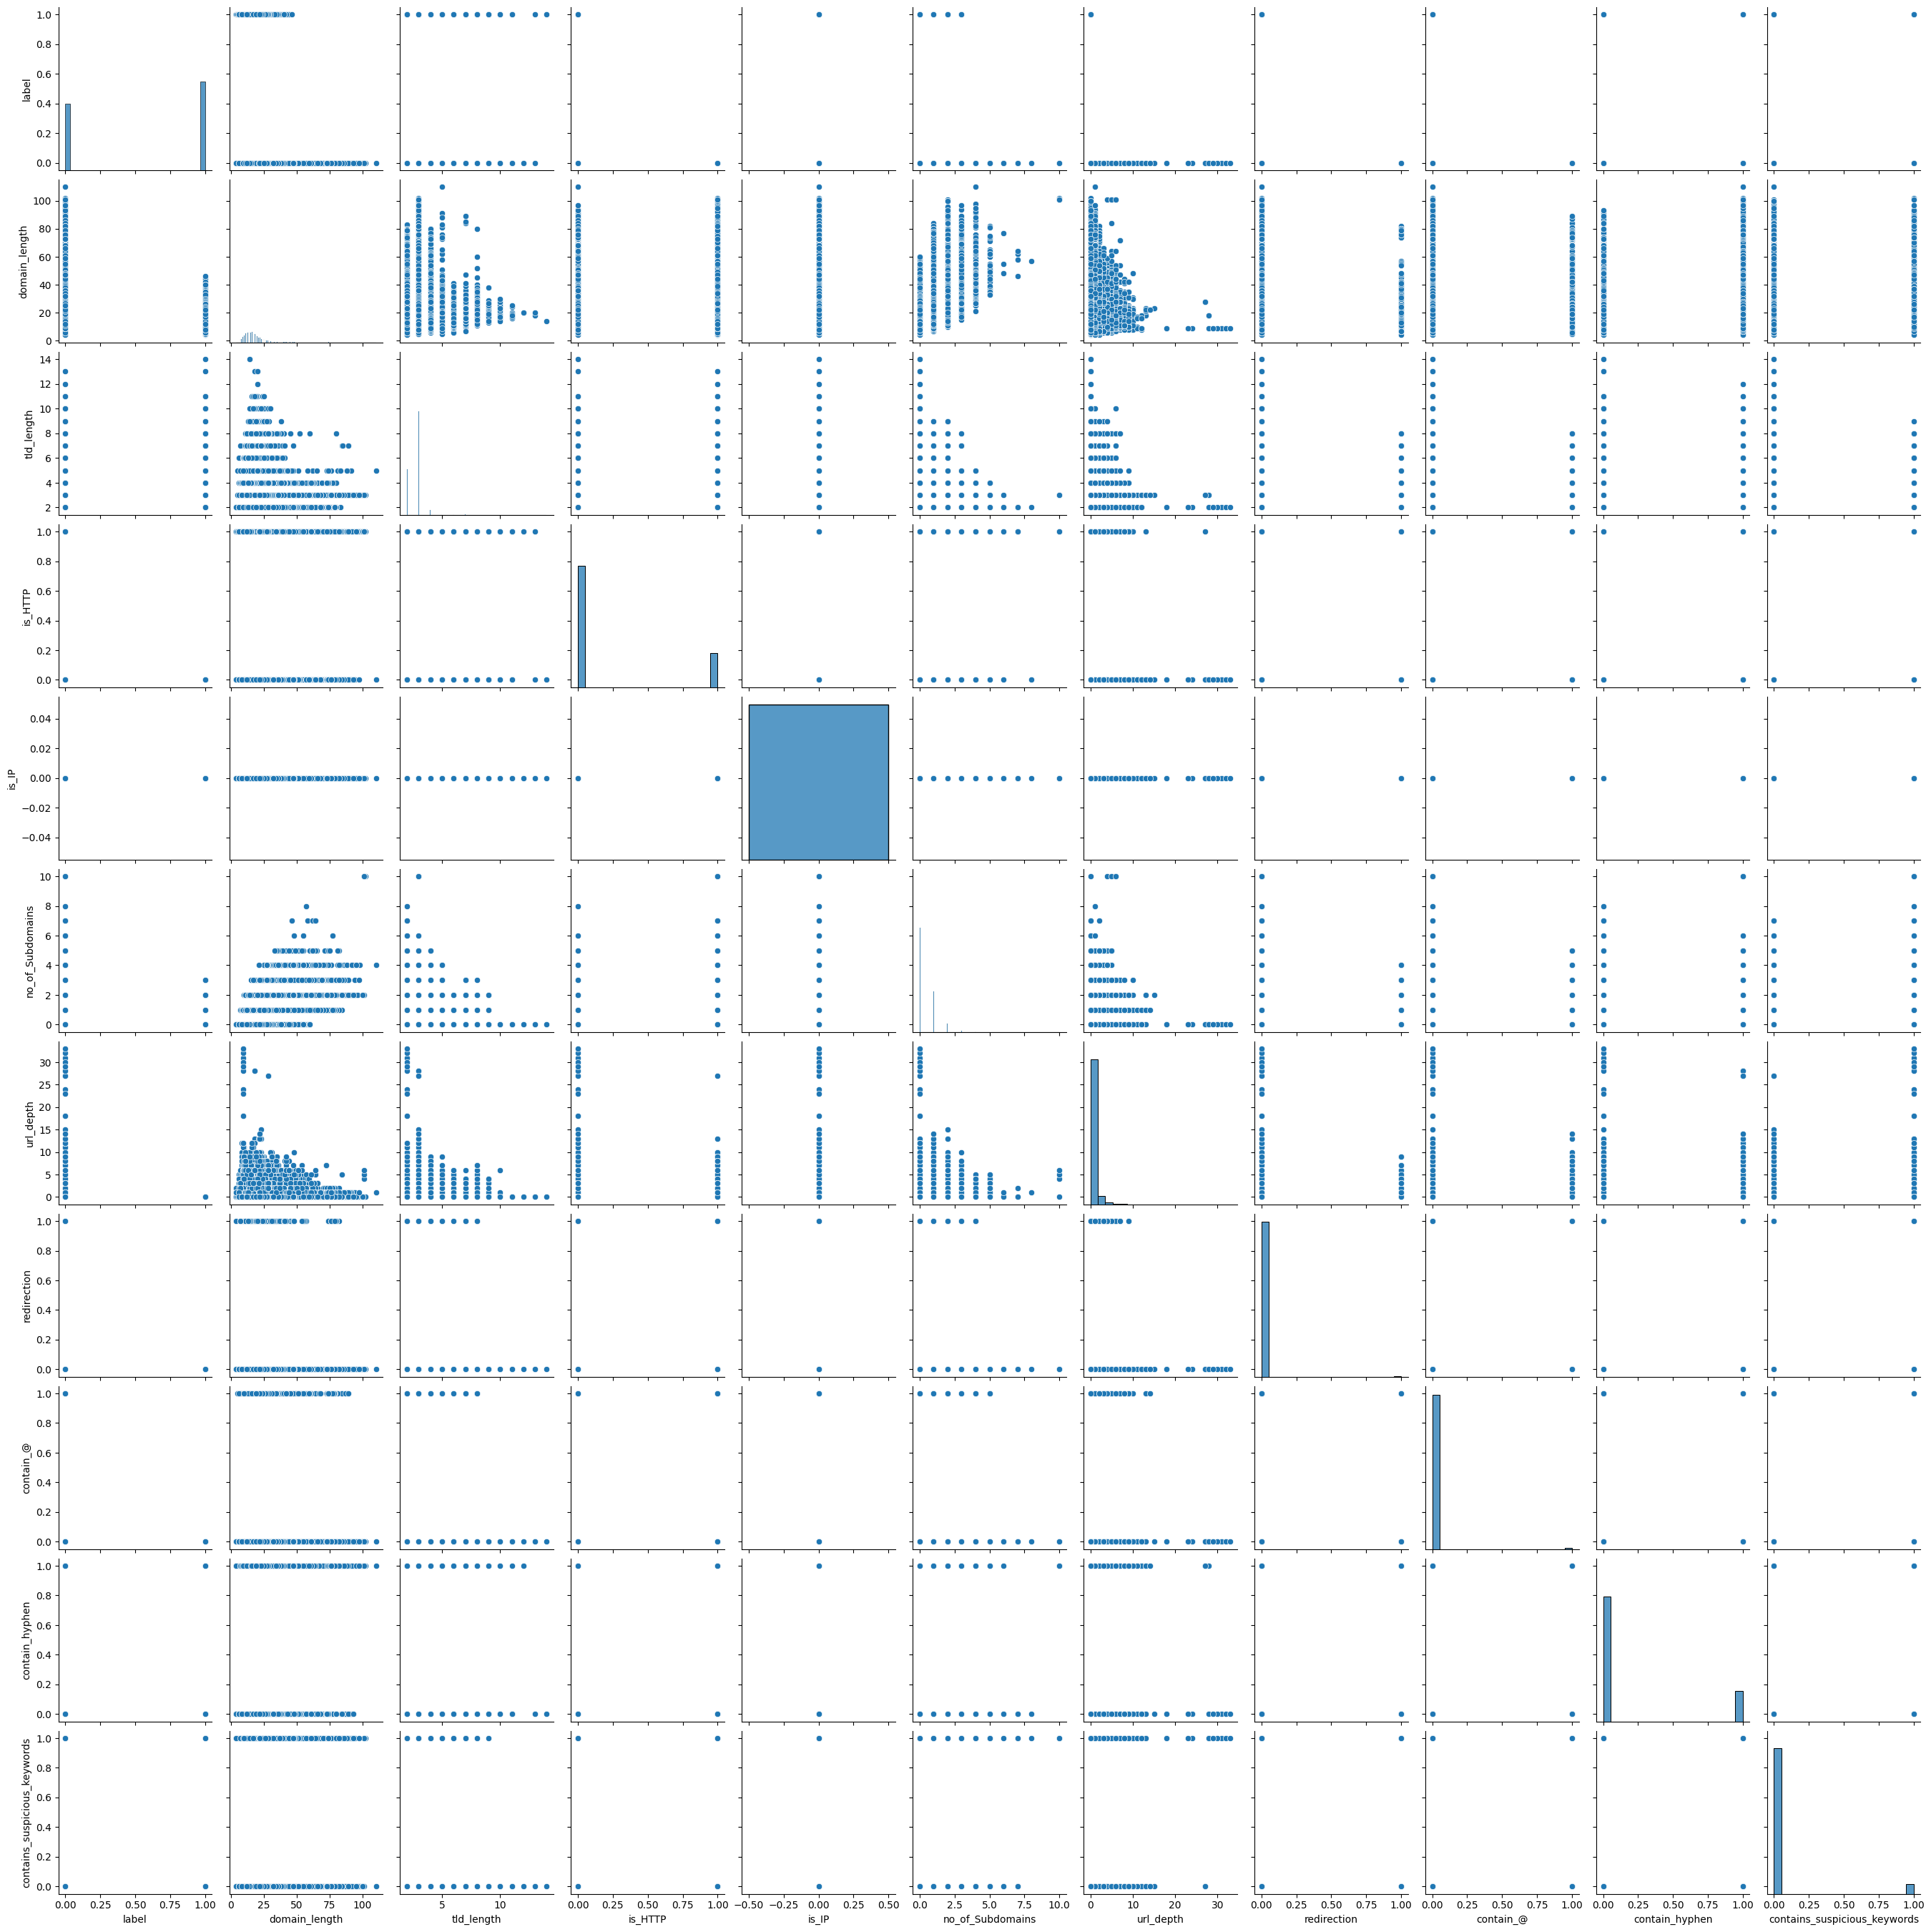

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   URL                           235795 non-null  object
 1   label                         235795 non-null  int64 
 2   domain                        235795 non-null  object
 3   domain_length                 235795 non-null  int64 
 4   tld                           235795 non-null  object
 5   tld_length                    235795 non-null  int64 
 6   is_HTTP                       235795 non-null  int64 
 7   is_IP                         235795 non-null  int64 
 8   no_of_Subdomains              235795 non-null  int64 
 9   url_depth                     235795 non-null  int64 
 10  redirection                   235795 non-null  int64 
 11  contain_@                     235795 non-null  int64 
 12  contain_hyphen                235795 non-null  int64 
 13 

<h1> Model Training </h1>

In [24]:
X = df.drop(columns= ["label","URL","domain","tld"])
y = df["label"]

In [25]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.25 , random_state= 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(176846, 10)
(58949, 10)
(176846,)
(58949,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score , classification_report , precision_score , recall_score 

In [56]:
lr = LogisticRegression(max_iter = 200)
svc = SVC(kernel = "linear")
dtc = DecisionTreeClassifier(max_depth = 20)
rfc = RandomForestClassifier(n_estimators = 200 , random_state=2,max_depth = 20,min_samples_split=5, min_samples_leaf=2)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [57]:
clf = {"LogisticRegression":lr ,
       "Support Vector Classifier":svc,
       "Decision Tree Classifier":dtc,
       "Random Forest Classifier":rfc,
}

acc = []
pcn = []
recall = []

In [58]:
def model_train(name,model):
  model.fit(X_train , y_train)
  y_pred = model.predict(X_test)

  acc.append(accuracy_score(y_test , y_pred))
  pcn.append(precision_score(y_test , y_pred))
  recall.append(recall_score(y_test , y_pred))

  print(name)
  print(classification_report(y_test , y_pred))
  print("\n\n\n")

In [59]:
for name,model in clf.items():
  model_train(name , model)

LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     25276
           1       0.96      0.98      0.97     33673

    accuracy                           0.97     58949
   macro avg       0.97      0.96      0.97     58949
weighted avg       0.97      0.97      0.97     58949





Support Vector Classifier
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     25276
           1       0.97      0.98      0.97     33673

    accuracy                           0.97     58949
   macro avg       0.97      0.97      0.97     58949
weighted avg       0.97      0.97      0.97     58949





Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     25276
           1       0.97      0.99      0.98     33673

    accuracy                           0.98     58949
   macro avg       0.98      0.98      0.98     58

In [60]:
clf["Light GBM"] = 1

In [61]:
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data])
y_pred_lgb = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_lgb_binary = np.round(y_pred_lgb)


acc.append(accuracy_score(y_test , y_pred_lgb_binary))
pcn.append(precision_score(y_test , y_pred_lgb_binary))
recall.append(recall_score(y_test , y_pred_lgb_binary))

print(classification_report(y_pred_lgb_binary,y_test))

[LightGBM] [Info] Number of positive: 101177, number of negative: 75669
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 176846, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.572119 -> initscore=0.290503
[LightGBM] [Info] Start training from score 0.290503
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     24556
         1.0       0.99      0.97      0.98     34393

    accuracy                           0.98     58949
   macro avg       0.98      0.98      0.98     58949
weighted avg       0.98      0.98      0.98     58949



In [62]:
model_performance = pd.DataFrame({"Algorithm":clf.keys() , "Accuracy": acc ,"Precision":pcn , "Recall":recall}).sort_values(by = ["Precision","Accuracy"] , ascending = [False,False])

In [63]:
print(model_performance)

                   Algorithm  Accuracy  Precision    Recall
1  Support Vector Classifier  0.969923   0.971866  0.975589
2   Decision Tree Classifier  0.977421   0.970580  0.990497
4                  Light GBM  0.977710   0.970430  0.991180
3   Random Forest Classifier  0.977693   0.970429  0.991150
0         LogisticRegression  0.966683   0.960739  0.981796


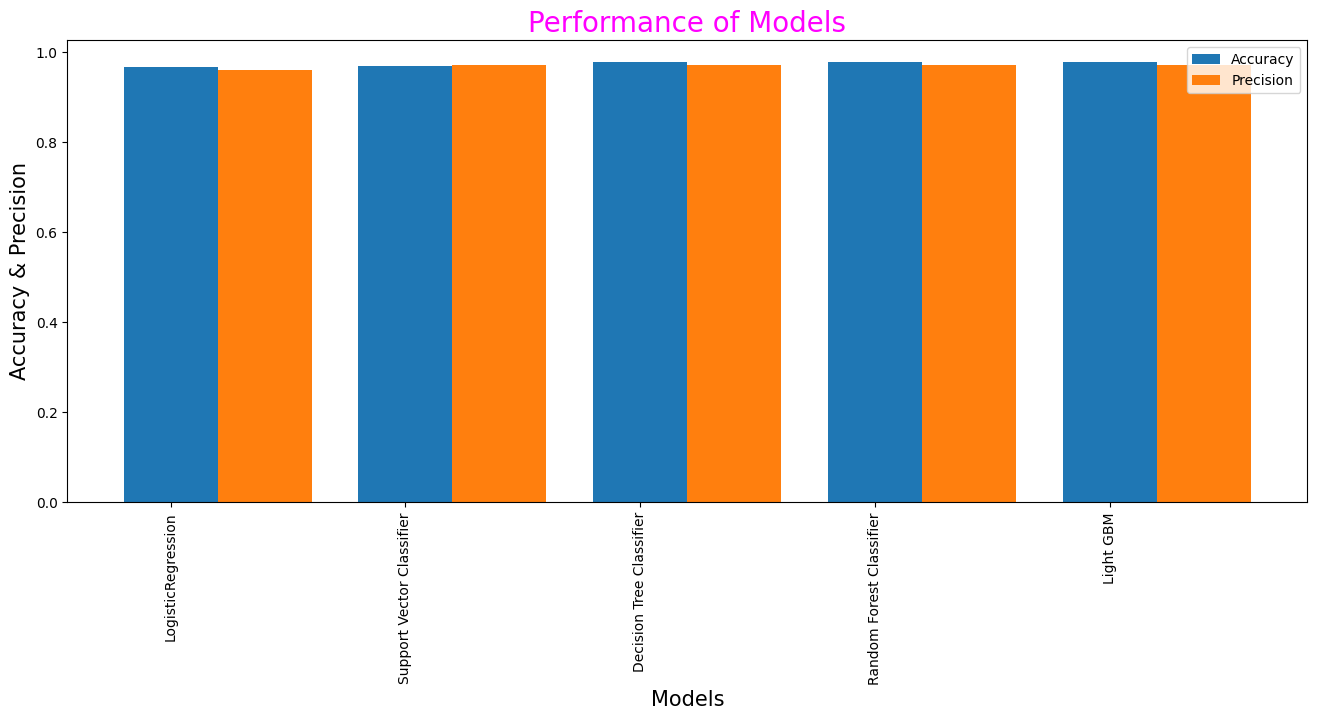

In [64]:
classifier_class = np.arange(len(clf.keys()))

plt.figure(figsize= (16,6))
width = 0.4

plt.bar(clf.keys() , acc , width, align = "center")
plt.bar(classifier_class+width , pcn, width )

plt.xlabel("Models" , fontsize = 15 , color = "k")
plt.ylabel("Accuracy & Precision",color = "k" ,fontsize = 15)

plt.xticks(rotation = "vertical")

plt.legend(["Accuracy","Precision"] , loc = 1)
plt.title("Performance of Models" , fontsize = 20 , color = "magenta")


plt.show()


In [68]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators = [("Random Forest Classifier",rfc) ,("Support Vector Classifier" , svc)],voting= "hard")

In [69]:
voting

VotingClassifier(estimators=[('Random Forest Classifier',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=2)),
                             ('Support Vector Classifier',
                              SVC(kernel='linear'))])

In [70]:
voting.fit(X_train , y_train)
y_pred = voting.predict(X_test)

print("Accuracy :- " , accuracy_score(y_test , y_pred))
print("Precision :- ",precision_score(y_test , y_pred))

Accuracy :-  0.9701097558906852
Precision :-  0.9725735272339543


In [71]:
import pickle 
pickle.dump(voting , open("Model.pkl","wb"))